In [2]:
import numpy as np
x = np.arange(1, 25)
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

M = 10
Phi = np.vander(x, M, increasing=True)

In [3]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def create_regression_models(Phi, y):
    models = [
    linear_model.LinearRegression(),
    linear_model.Lasso(),
    linear_model.Ridge(),
    linear_model.ElasticNet()
    ]
    # Create a pipeline for each model that includes scaling
    pipelines = [make_pipeline(StandardScaler(), model) for model in models]
    # Fit each pipeline
    fitted_models = [pipeline.fit(Phi, y) for pipeline in pipelines]
    return fitted_models

models = create_regression_models(Phi, y)

for model in models:
    y_pred = model.predict(Phi)
    error = np.linalg.norm(y - y_pred) / np.linalg.norm(y)
    print(f"Model: {model.__class__.__name__}, Relative L2 Norm Error: {error}")

Model: Pipeline, Relative L2 Norm Error: 0.009102100459173295
Model: Pipeline, Relative L2 Norm Error: 0.06809327109733027
Model: Pipeline, Relative L2 Norm Error: 0.04082147715888493
Model: Pipeline, Relative L2 Norm Error: 0.1008326570763539


In [4]:
def corrupt(y):
    y_corrupted = np.copy(y)
    indices = np.random.choice(len(y_corrupted), np.random.randint(1, 4), replace=False)
    y_corrupted[indices] = 0
    return y_corrupted, indices

y_corrupted, random_indices = corrupt(y)
models = create_regression_models(Phi, y_corrupted)

Model: LinearRegression, Zero Coefficients: 1
Model: Lasso, Zero Coefficients: 8
Model: Ridge, Zero Coefficients: 1
Model: ElasticNet, Zero Coefficients: 3


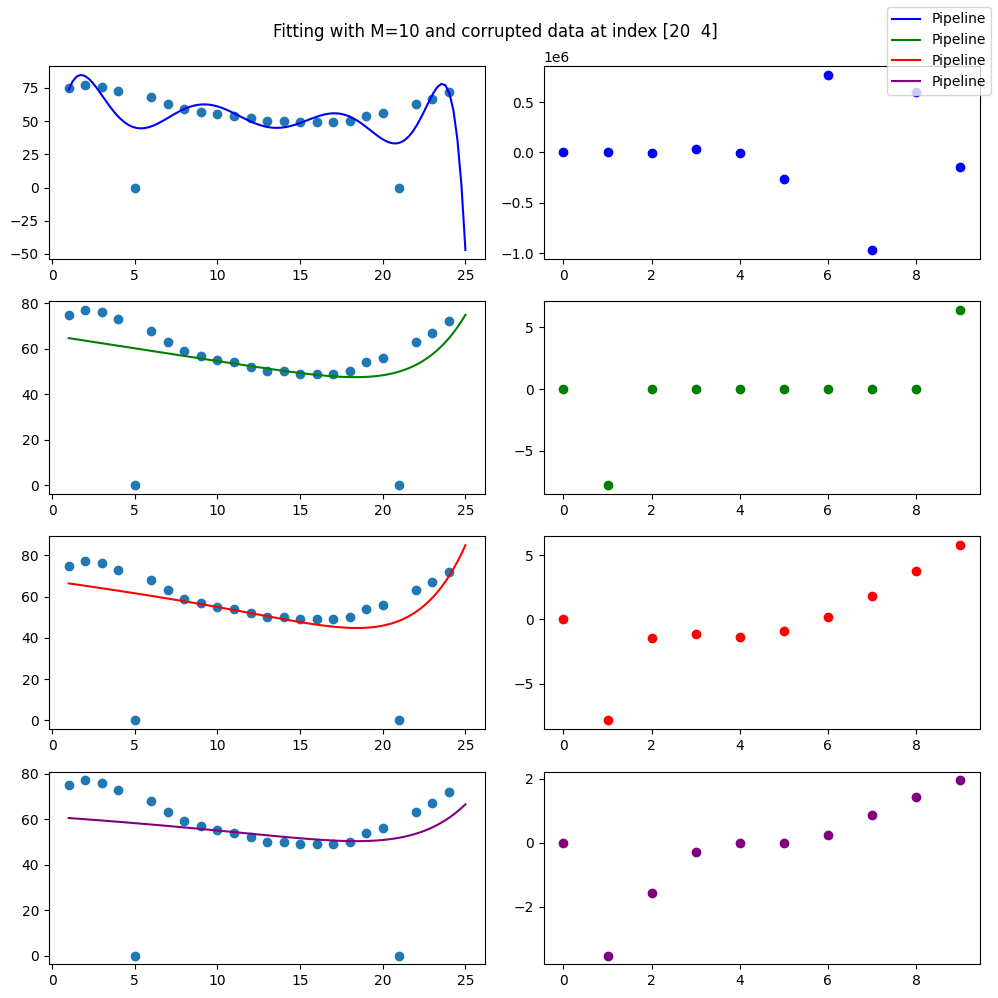

In [5]:
from matplotlib import pyplot as plt

x_fit = np.linspace(1, 25, 100)
Phi_fit = np.vander(x_fit, M, increasing=True)
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
colors = ['blue', 'green', 'red', 'purple']

for index, ax in enumerate(axs):
    ax[0].scatter(x, y_corrupted)
    ax[0].plot(x_fit, models[index].predict(Phi_fit), label=models[index].__class__.__name__, color=colors[index])
    model_name = models[index].named_steps[models[index].steps[1][0]].__class__.__name__
    coef = models[index].named_steps[models[index].steps[1][0]].coef_
    ax[1].plot(coef, "o", color=colors[index])
    print(f"Model: {model_name}, Zero Coefficients: {np.sum(coef == 0)}")
fig.suptitle(f'Fitting with M={M} and corrupted data at index {random_indices}')
fig.legend()
fig.tight_layout()

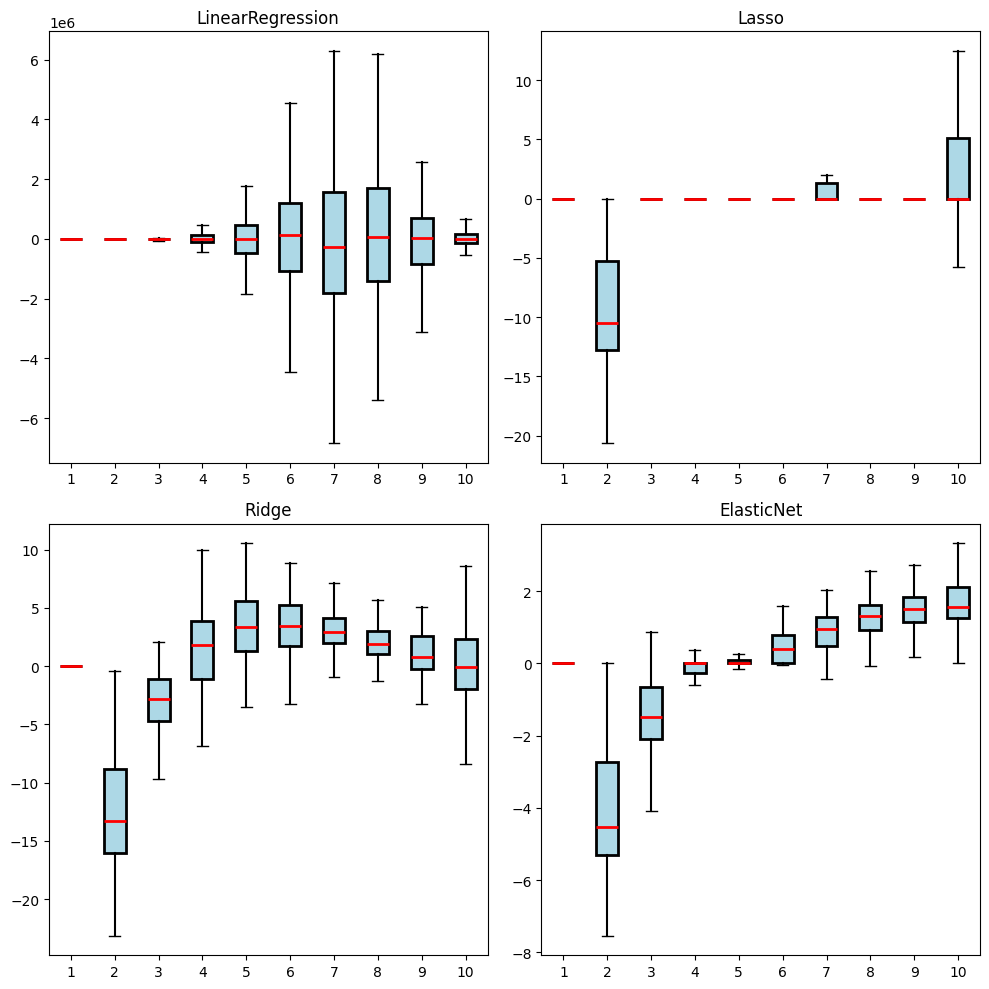

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

coef_dict = {}
for i in range(100):
    y_corrupted, random_indices = corrupt(y)
    models = create_regression_models(Phi, y_corrupted)
    for index in range(len(models)):
        coef = models[index].named_steps[models[index].steps[1][0]].coef_
        model_name = models[index].named_steps[models[index].steps[1][0]].__class__.__name__
        coef_dict[model_name] = coef if model_name not in coef_dict else np.vstack((coef_dict[model_name], coef))

model_map = {0: "LinearRegression", 1: "Lasso", 2: "Ridge", 3: "ElasticNet"}
for index, ax in enumerate(axs.flatten()):
    ax.boxplot(coef_dict[model_map[index]], showfliers=False, patch_artist=True, boxprops=dict(facecolor='lightblue', linewidth=2), whiskerprops=dict(color='black', linewidth=1.5), medianprops=dict(color='red', linewidth=2))
    ax.set_title(model_map[index]) 
fig.tight_layout()

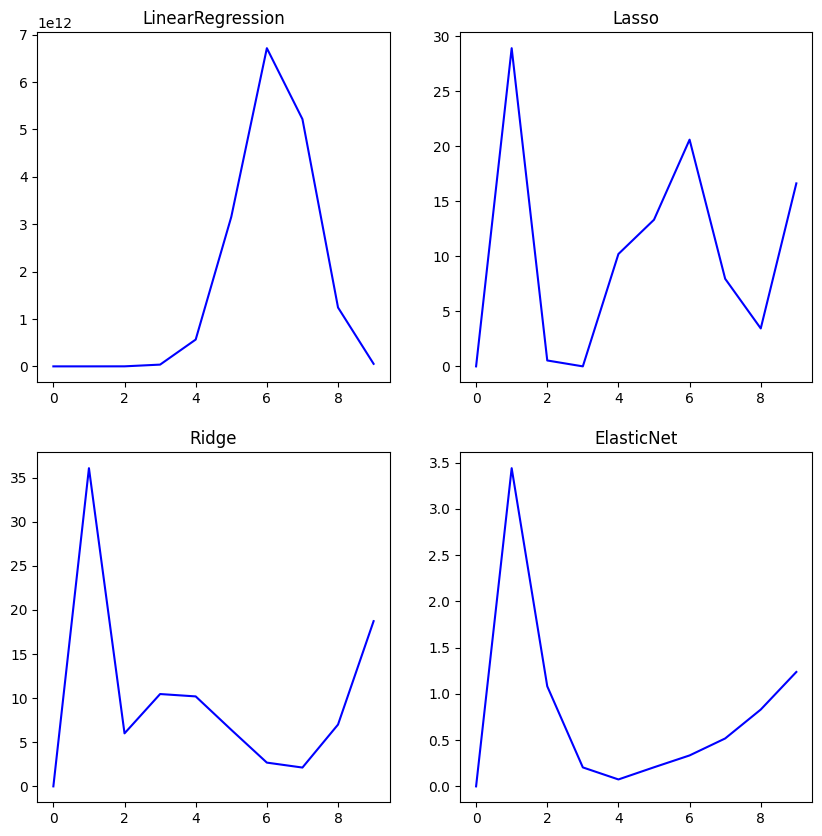

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for index, ax in enumerate(axs.flatten()):
    ax.plot([np.var(coef) for coef in coef_dict[model_map[index]].T], color='blue')
    ax.set_title(model_map[index])